<a href="https://colab.research.google.com/github/TredNR/data_lab/blob/main/Ex_data_lab_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

Ковариация и коэффициент корреляции. Пример методического указания

In [298]:
import pandas as pd
import scipy as sc
import seaborn as sns

import numpy as np
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [299]:
x = list(range(-10, 11))

In [300]:
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

In [301]:
x_, y_ = np.array(x), np.array(y)

In [302]:
x__, y__ = pd.Series(x_), pd.Series(y_) # объекты Series библиотеки Pandas, что позволяет использовать встроенные статистические функции

In [303]:
cov_matrix = np.cov(x_, y_) # вычисляем ковариацию между x_ и y_, формируя матрицу 2×2
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [304]:
cov_xy = cov_matrix[0, 1] # значение ковариации между x_ и y_
cov_xy

np.float64(19.95)

In [305]:
cov_xy = cov_matrix[1, 0] # ковариационная матрица симметрична, поэтому cov_matrix[1, 0] должно быть равно cov_matrix[0, 1]
cov_xy

np.float64(19.95)

In [306]:
cov_xy = x__.cov(y__) # метод cov() у объекта Series вычисляет ковариацию между x__ и y__
cov_xy # должен совпадать с результатом np.cov() - что он и делает

np.float64(19.95)

In [307]:
cov_xy = y__.cov(x__) # аналогично предыдущему шагу, проверяем ковариацию, но уже для y__ относительно x__
cov_xy

np.float64(19.95)

In [308]:
r, p = sc.stats.pearsonr(x_, y_) # вычисляет коэффициент корреляции Пирсона

In [309]:
r # коэффициент корреляции

np.float64(0.8619500056316061)

In [310]:
p # значимость корреляции

np.float64(5.122760847201135e-07)

In [311]:
sc.stats.linregress(x_, y_) # находит параметры линейной регрессии y = a*x + b

LinregressResult(slope=np.float64(0.5181818181818181), intercept=np.float64(5.714285714285714), rvalue=np.float64(0.861950005631606), pvalue=np.float64(5.122760847201164e-07), stderr=np.float64(0.06992387660074979), intercept_stderr=np.float64(0.4234100995002589))

In [312]:
result = sc.stats.linregress(x_, y_) # тот же коэффициент корреляции Пирсона, но вычисленный в рамках регрессии

In [313]:
r = result.rvalue

In [314]:
r

np.float64(0.861950005631606)

In [315]:
r = x__.corr(y__) # вычисляет корреляцию между x__ и y__

In [316]:
# должен совпадать с результатом pearsonr() и linregress().rvalue

In [317]:
r

np.float64(0.8619500056316061)

In [318]:
r = y__.corr(x__)

In [319]:
r

np.float64(0.861950005631606)

## Тестовая задача

Определим простой набор данных из двух переменных, где каждая переменная берется из равномерного распределения (например, негауссова), а значения
второй переменной зависят от значений первого значения.


В частности, выборка из 1000 случайных значений с плавающей запятой берется из равномерного распределения и масштабируется до диапазона от 0 до 20.

Вторая выборка из 1000 случайных значений с плавающей запятой берется из равномерного распределения между 0 и 10 и добавляется к значениям в Первый образец для создания ассоциации.

In [64]:
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

In [65]:
seed(1) # случайные числа будут одинаковыми при каждом запуске

In [66]:
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)

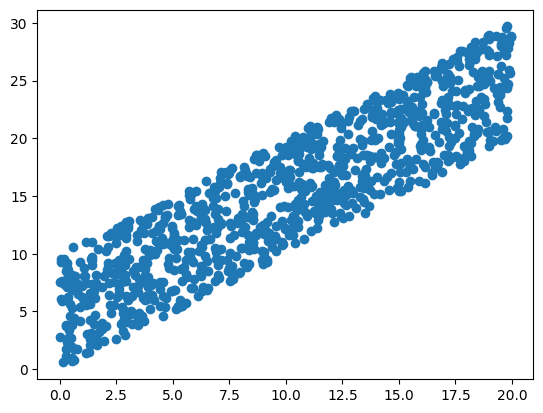

In [67]:
pyplot.scatter(data1, data2) # построение диаграммы рассеяния
pyplot.show()

### Ранговая корреляция Спирмена

In [69]:
from scipy.stats import spearmanr

In [70]:
coef, p = spearmanr(data1, data2) # коэффициент ранговой корреляции Спирмена (от -1 до 1)
print('Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: 0.900


In [71]:
# проверка статистической значимости корреляции Спирмена
alpha = 0.05
if p > alpha: # считаем, что связи нет
  print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else: # считаем, что есть статистически значимая связь
  print('Samples are correlated (reject H0) p=%.3f' % p)

Samples are correlated (reject H0) p=0.000


### Ранговая корреляция Кендалла

In [72]:
from scipy.stats import kendalltau

In [73]:
coef, p = kendalltau(data1, data2) # аналогично Спирмену, но учитывает порядок парных перестановок
print('Kendall correlation coefficient: %.3f' % coef)

Kendall correlation coefficient: 0.709


In [74]:
alpha = 0.05
if p > alpha:
  print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
  print('Samples are correlated (reject H0) p=%.3f' % p)

Samples are correlated (reject H0) p=0.000


### Работа с 2D данными

In [76]:
a = np.array([
    [1, 1, 1],
    [2, 3, 1],
    [4, 9, 2],
    [8, 27, 4],
    [16, 1, 1]
])

print(a)

[[ 1  1  1]
 [ 2  3  1]
 [ 4  9  2]
 [ 8 27  4]
 [16  1  1]]


In [78]:
np.mean(a) # среднее арифметическое

np.float64(5.4)

In [79]:
a.mean()

np.float64(5.4)

In [80]:
np.median(a) # медиана всех элементов матрицы

np.float64(2.0)

In [81]:
a.var(ddof=1) # выборочная дисперсия (variance) всех элементов

np.float64(53.40000000000001)

In [82]:
np.mean(a, axis=0) # средние значения по столбцам

array([6.2, 8.2, 1.8])

In [83]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [84]:
np.mean(a, axis=1) # средние значения по строкам

array([ 1.,  2.,  5., 13.,  6.])

In [86]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [87]:
np.median(a, axis=0) # медиана по столбцам и строкам

array([4., 3., 1.])

In [88]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [89]:
a.var(axis=0, ddof=1) # выборочная дисперсия по столбцам и строкам

array([ 37.2, 121.2,   1.7])

In [91]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [94]:
sc.stats.gmean(a) # геометрическое среднее

array([4.        , 3.73719282, 1.51571657])

In [95]:
sc.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

In [96]:
sc.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [97]:
sc.stats.gmean(a, axis=None)

np.float64(2.829705017016332)

In [98]:
sc.stats.describe(a, axis=None, ddof=1, bias=False) # возвращает основные статистические характеристики

DescribeResult(nobs=15, minmax=(np.int64(1), np.int64(27)), mean=np.float64(5.4), variance=np.float64(53.40000000000001), skewness=np.float64(2.264965290423389), kurtosis=np.float64(5.212690982795767))

In [99]:
sc.stats.describe(a, ddof=1, bias=False) # анализ всех элементов массива

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [100]:
sc.stats.describe(a, axis=1, ddof=1, bias=False) # статистический анализ по строкам

<ipython-input-100-c3a829280fc9>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sc.stats.describe(a, axis=1, ddof=1, bias=False)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1418: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1419: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(a, axis, bias=bias)


DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([       nan, 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([ nan, -1.5, -1.5, -1.5, -1.5]))

In [102]:
result = sc.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean # извлечение среднего значения из результата

<ipython-input-102-e2ce6d368a3d>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  result = sc.stats.describe(a, axis=1, ddof=1, bias=False)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1418: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1419: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(a, axis, bias=bias)


array([ 1.,  2.,  5., 13.,  6.])

### Работа с DataFrame

In [104]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [105]:
df.mean()

,0
A,6.2
B,8.2
C,1.8


In [106]:
df.var()

,0
A,37.2
B,121.2
C,1.7


In [107]:
df.mean(axis=1)

,0
first,1.0
second,2.0
third,5.0
fourth,13.0
fifth,6.0


In [108]:
df.var(axis=1)

,0
first,0.0
second,1.0
third,13.0
fourth,151.0
fifth,75.0


In [109]:
df['A']

,A
first,1
second,2
third,4
fourth,8
fifth,16


In [111]:
df['A'].mean()

np.float64(6.2)

In [112]:
df['A'].var()

37.20000000000001

In [113]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [114]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [115]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [116]:
df.describe().at['mean', 'A']

np.float64(6.2)

In [117]:
df.describe().at['50%', 'B']

np.float64(3.0)

### Визуализация

In [118]:
plt.style.use('ggplot')

In [119]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

<ipython-input-120-ac67a34c93bf>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,


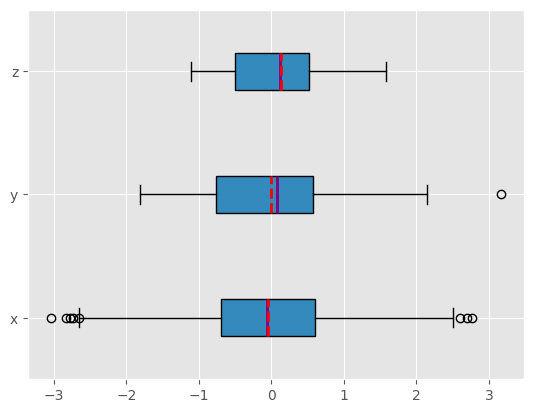

In [120]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
labels=('x', 'y', 'z'), patch_artist=True,
medianprops={'linewidth': 2, 'color': 'purple'},
meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

In [121]:
hist, bin_edges = np.histogram(x, bins=10)
print(f'{hist}\n\n{bin_edges}')

[  9  20  70 146 217 239 160  86  38  15]

[-3.04614305 -2.46559324 -1.88504342 -1.3044936  -0.72394379 -0.14339397
  0.43715585  1.01770566  1.59825548  2.1788053   2.75935511]


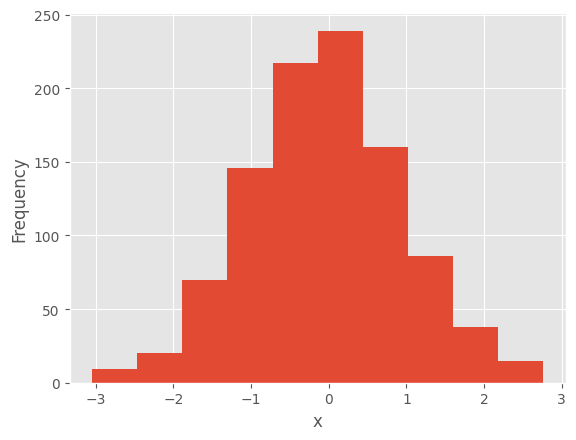

In [122]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

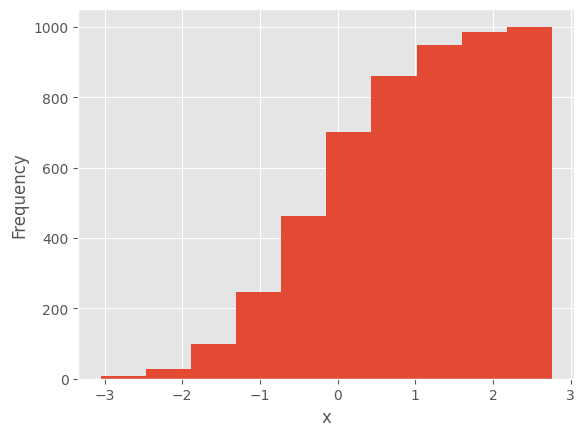

In [123]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

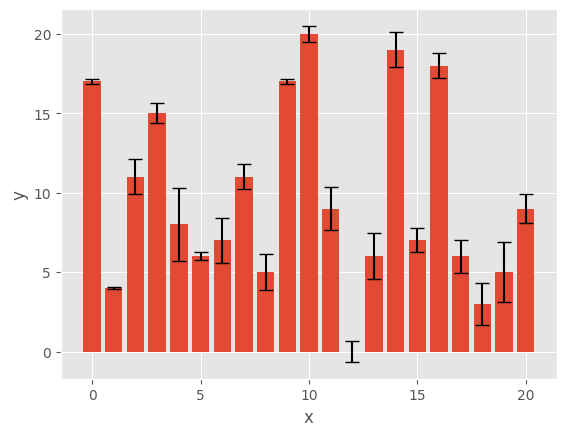

In [131]:
x = np.arange(21)
y = np.random.randint(0, 21, size=21)  # случайные значения от 0 до 20
err = np.abs(np.random.randn(21))  # берем модуль, чтобы убрать отрицательные значения

fig, ax = plt.subplots()
ax.bar(x, y, yerr=err, capsize=5)  # capsize добавляет "шапочки" к погрешностям
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

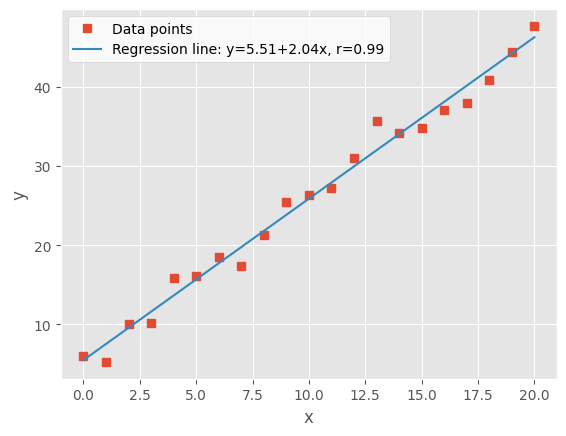

In [133]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = sc.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

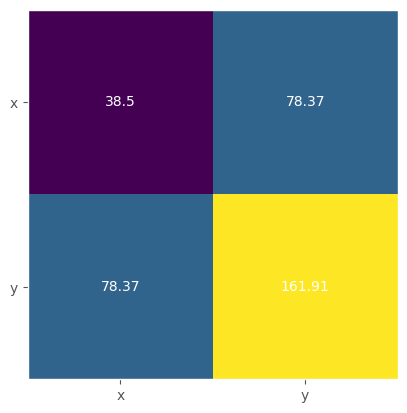

In [134]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

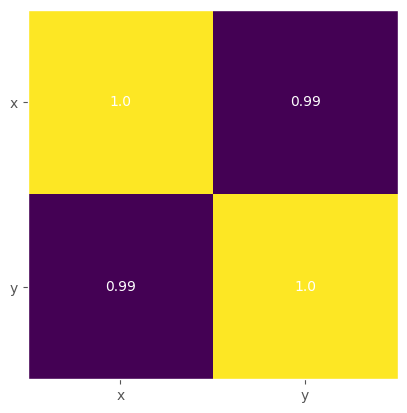

In [135]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

# Задание 2

В приложенном файле realty.csv содержатся данные о продаваемых квартирах.

Необходимо рассчитать корреляцию по Пирсону, по Кендаллу и по Спирмену и визуально
показать корреляцию по Пирсону:

1. Между стоимостью квартиры и ее метражом (первая
цифра в соответствующем столбце);
2. Между стоимостью и этажом (первая цифра в
соответствующем столбце);
3. Между стоимостью и количеством комнат.

Аналогичные расчеты выполнить для всех квартир из одного района.

Сравнить полученные результаты для района и для всего города.

In [136]:
!wget -O realty.csv https://github.com/TredNR/data_lab/raw/refs/heads/main/realty.csv

--2025-03-24 08:18:36--  https://github.com/TredNR/data_lab/raw/refs/heads/main/realty.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TredNR/data_lab/refs/heads/main/realty.csv [following]
--2025-03-24 08:18:36--  https://raw.githubusercontent.com/TredNR/data_lab/refs/heads/main/realty.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131942 (129K) [application/octet-stream]
Saving to: ‘realty.csv’

realty.csv          100%[===================>] 128.85K  --.-KB/s    in 0.02s   

2025-03-24 08:18:36 (7.59 MB/s) - ‘realty.csv’ saved [131942/131942]



In [262]:
df = pd.read_csv("/content/realty.csv", encoding="windows-1251", sep=";")
df

,ID,Rooms,District,Meters,Floor,House,Price,Interier
0,201121198,4,Железнодорожный,81.3/59.6/7.3,4/4,Кирпичный,4250000,Евроремонт
1,241867050,2,Железнодорожный,71.0/36.5/11.0,16/16,Кирпичный,7000000,Дизайнерский
2,163856701,3,Самарский,131.7/70.6/20.8,3/5,Кирпичный,11000000,Дизайнерский
3,164483784,1,Ленинский,59.28/21.6/19.5,4/12,Кирпичный,3190000,Нет данных
4,164484343,3,Самарский,72.3/44.5/9.6,3/7,Кирпичный,6300000,Косметический
...,...,...,...,...,...,...,...,...
1795,242483528,1,Промышленный,41.0/19.0/11.0,13/27,Монолитный,3600000,Дизайнерский
1796,242492073,2,Советский,44.5/30.3/5.8,4/5,Блочный,2875000,Дизайнерский
1797,242498610,1,Ленинский,55.1/23.6/14.0,5/8,Кирпичный,4700000,Без ремонта
1798,242499100,2,Железнодорожный,75.0/38.0/14.0,17/18,Монолитно-кирпичный,4650000,Без ремонта


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1800 non-null   int64 
 1   Rooms     1800 non-null   int64 
 2   District  1800 non-null   object
 3   Meters    1800 non-null   object
 4   Floor     1800 non-null   object
 5   House     1800 non-null   object
 6   Price     1800 non-null   int64 
 7   Interier  1800 non-null   object
dtypes: int64(3), object(5)
memory usage: 112.6+ KB


In [264]:
# Разделим столбцы
df[['Total_Meters', 'Living_Meters', 'Kitchen_Meters']] = df['Meters'].str.split('/', expand=True).astype(float)
df[['Current_Floor', 'Total_Floors']] = df['Floor'].str.split('/', expand=True).astype(int)

In [265]:
# Удалим лишнее
df.drop(columns=['Meters', 'Floor'], inplace=True)

In [266]:
df.head()

,ID,Rooms,District,House,Price,Interier,Total_Meters,Living_Meters,Kitchen_Meters,Current_Floor,Total_Floors
0,201121198,4,Железнодорожный,Кирпичный,4250000,Евроремонт,81.30,59.6,7.3,4,4
1,241867050,2,Железнодорожный,Кирпичный,7000000,Дизайнерский,71.00,36.5,11.0,16,16
2,163856701,3,Самарский,Кирпичный,11000000,Дизайнерский,131.70,70.6,20.8,3,5
3,164483784,1,Ленинский,Кирпичный,3190000,Нет данных,59.28,21.6,19.5,4,12
4,164484343,3,Самарский,Кирпичный,6300000,Косметический,72.30,44.5,9.6,3,7


## Дополнительные элементы

In [276]:
data = {
    "Метрика": [],
    "Пирсон (все районы)": [],
    "Пирсон (конкретный)": [],
    "Спирмен (все районы)": [],
    "Спирмен (конкретный)": [],
    "Кендалл (все районы)": [],
    "Кендалл (конкретный)": [],
}

In [268]:
def corr_func(df, row_name, all_district=True):
    """
    Вычисляет корреляции и добавляет результаты в структуру data.

    Параметры:
    - df: DataFrame с данными.
    - row_name: Имя строки в data.
    - all_district: Флаг (True - все районы, False - конкретный район).
    """
    pearson_corr = df.corr(method="pearson").iloc[0, 1]
    spearman_corr = df.corr(method="spearman").iloc[0, 1]
    kendall_corr = df.corr(method="kendall").iloc[0, 1]

    print(f"{row_name}:\nПирсон: {pearson_corr:.3f}, Спирмен: {spearman_corr:.3f}, Кендалл: {kendall_corr:.3f}\n")

    if all_district:
        data["Метрика"].append(row_name)
        data["Пирсон (все районы)"].append(pearson_corr)
        data["Спирмен (все районы)"].append(spearman_corr)
        data["Кендалл (все районы)"].append(kendall_corr)
        data["Пирсон (конкретный)"].append(None)
        data["Спирмен (конкретный)"].append(None)
        data["Кендалл (конкретный)"].append(None)
    else:
        index = data["Метрика"].index(row_name)
        data["Пирсон (конкретный)"][index] = pearson_corr
        data["Спирмен (конкретный)"][index] = spearman_corr
        data["Кендалл (конкретный)"][index] = kendall_corr

    return pearson_corr, spearman_corr, kendall_corr

## Корреляция между столбцами Price и Total_Meters

In [278]:
pearson_corr, spearman_corr, kendall_corr = corr_func(df[['Price', 'Total_Meters']].dropna(), "Цена vs. Метраж", all_district=True)

Цена vs. Метраж:
Пирсон: 0.873, Спирмен: 0.840, Кендалл: 0.649



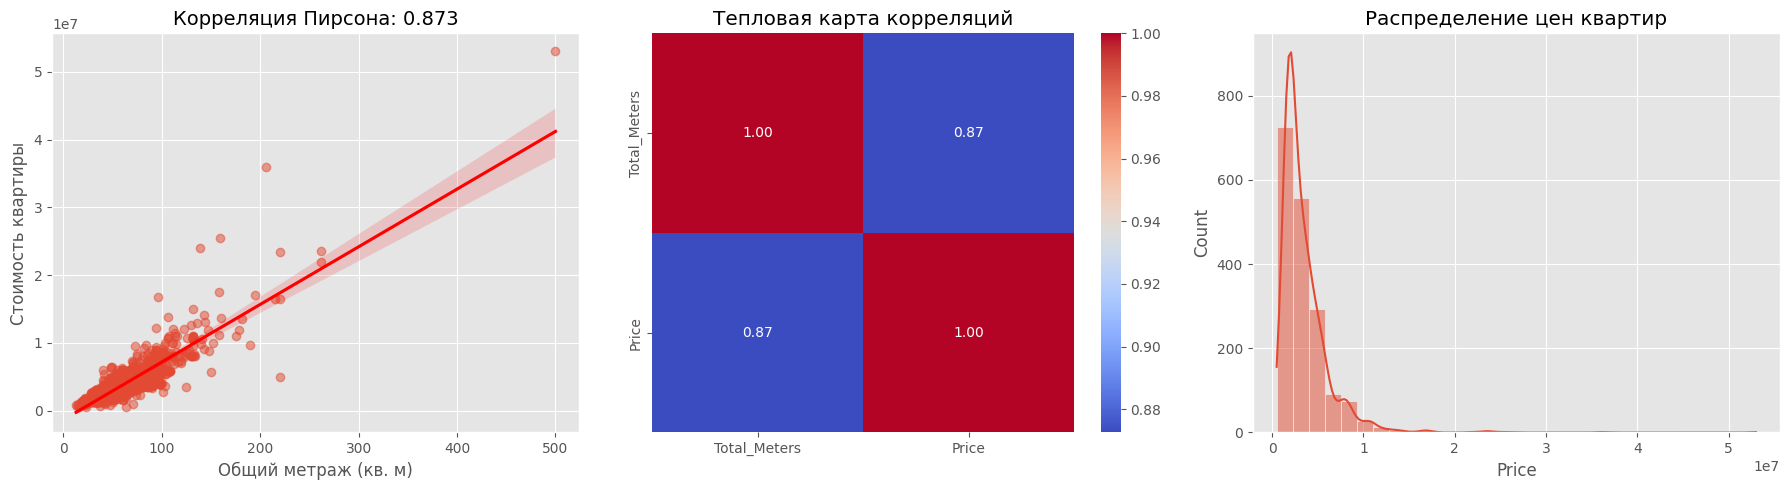

In [279]:
plt.figure(figsize=(18, 5))

# 1. График рассеяния с линейной регрессией
plt.subplot(1, 3, 1)
sns.regplot(x=df['Total_Meters'], y=df['Price'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f"Корреляция Пирсона: {pearson_corr:.3f}", fontsize=14)
plt.xlabel("Общий метраж (кв. м)", fontsize=12)
plt.ylabel("Стоимость квартиры", fontsize=12)
plt.grid(True)

# 2. Тепловая карта корреляций
plt.subplot(1, 3, 2)
sns.heatmap(df[['Total_Meters', 'Price']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")

# 3. Диаграмма распределения цены
plt.subplot(1, 3, 3)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Распределение цен квартир")

plt.tight_layout()
plt.show()

## Корреляция между столбцами Price и Current_Floor

In [280]:
pearson_corr, spearman_corr, kendall_corr = corr_func(df[['Price', 'Current_Floor']].dropna(), "Цена vs. Этаж", all_district=True)

Цена vs. Этаж:
Пирсон: 0.052, Спирмен: 0.161, Кендалл: 0.112



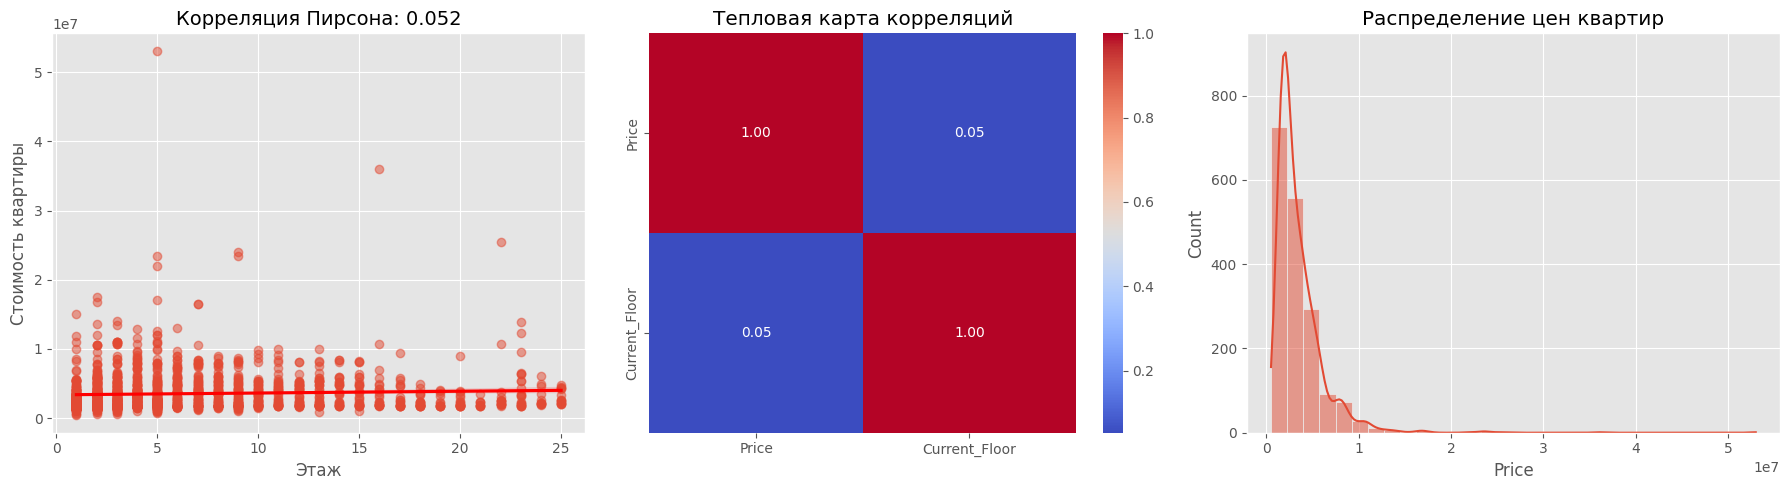

In [281]:
plt.figure(figsize=(18, 5))

# 1. График рассеяния с линейной регрессией
plt.subplot(1, 3, 1)
sns.regplot(x=df['Current_Floor'], y=df['Price'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f"Корреляция Пирсона: {pearson_corr:.3f}", fontsize=14)
plt.xlabel("Этаж", fontsize=12)
plt.ylabel("Стоимость квартиры", fontsize=12)
plt.grid(True)

# 2. Тепловая карта корреляций
plt.subplot(1, 3, 2)
sns.heatmap(df[['Price', 'Current_Floor']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")

# 3. Диаграмма распределения цены
plt.subplot(1, 3, 3)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Распределение цен квартир")

plt.tight_layout()
plt.show()

## Корреляция между столбцами Price и Rooms

In [282]:
pearson_corr, spearman_corr, kendall_corr = corr_func(df[['Price', 'Rooms']].dropna(), "Цена vs. Кол-во комнат", all_district=True)

Цена vs. Кол-во комнат:
Пирсон: 0.558, Спирмен: 0.625, Кендалл: 0.501



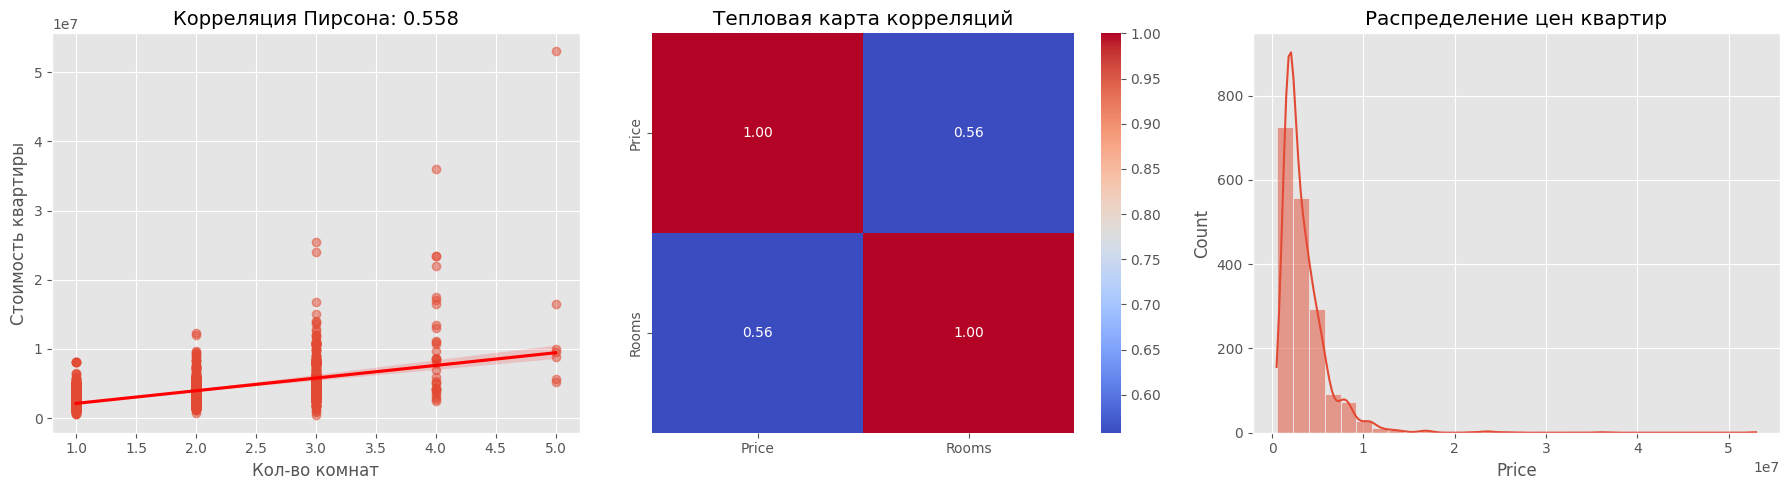

In [283]:
plt.figure(figsize=(18, 5))

# 1. График рассеяния с линейной регрессией
plt.subplot(1, 3, 1)
sns.regplot(x=df['Rooms'], y=df['Price'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f"Корреляция Пирсона: {pearson_corr:.3f}", fontsize=14)
plt.xlabel("Кол-во комнат", fontsize=12)
plt.ylabel("Стоимость квартиры", fontsize=12)
plt.grid(True)

# 2. Тепловая карта корреляций
plt.subplot(1, 3, 2)
sns.heatmap(df[['Price', 'Rooms']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")

# 3. Диаграмма распределения цены
plt.subplot(1, 3, 3)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Распределение цен квартир")

plt.tight_layout()
plt.show()

## Аналогичные расчеты для одного района

Определим наиболее полную выборку основываясь на списке районов, выберем наиболее распространенный вариант в наборе данных

In [285]:
df.head()

,ID,Rooms,District,House,Price,Interier,Total_Meters,Living_Meters,Kitchen_Meters,Current_Floor,Total_Floors
0,201121198,4,Железнодорожный,Кирпичный,4250000,Евроремонт,81.30,59.6,7.3,4,4
1,241867050,2,Железнодорожный,Кирпичный,7000000,Дизайнерский,71.00,36.5,11.0,16,16
2,163856701,3,Самарский,Кирпичный,11000000,Дизайнерский,131.70,70.6,20.8,3,5
3,164483784,1,Ленинский,Кирпичный,3190000,Нет данных,59.28,21.6,19.5,4,12
4,164484343,3,Самарский,Кирпичный,6300000,Косметический,72.30,44.5,9.6,3,7


In [286]:
print(df['District'].unique())

['Железнодорожный' 'Самарский' 'Ленинский' 'Кировский' 'Куйбышевский'
 'Промышленный' 'Октябрьский' 'Красноглинский' 'Советский']


In [287]:
most_popular_district = df['District'].value_counts().idxmax()
df_filtered = df[df['District'] == most_popular_district]

In [288]:
df_filtered.head()

,ID,Rooms,District,House,Price,Interier,Total_Meters,Living_Meters,Kitchen_Meters,Current_Floor,Total_Floors
0,201121198,4,Железнодорожный,Кирпичный,4250000,Евроремонт,81.3,59.6,7.3,4,4
1,241867050,2,Железнодорожный,Кирпичный,7000000,Дизайнерский,71.0,36.5,11.0,16,16
10,197011642,2,Железнодорожный,Монолитно-кирпичный,5650000,Евроремонт,65.3,33.1,12.8,2,18
110,213428243,3,Железнодорожный,Кирпичный,3200000,Косметический,70.0,50.0,8.7,4,4
113,214403221,3,Железнодорожный,Кирпичный,1750000,Без ремонта,52.5,35.9,6.2,1,2


## Корреляция между столбцами Price и Total_Meters для одного района

In [289]:
pearson_corr, spearman_corr, kendall_corr = corr_func(df_filtered[['Price', 'Total_Meters']].dropna(), "Цена vs. Метраж", all_district=False)

Цена vs. Метраж:
Пирсон: 0.743, Спирмен: 0.759, Кендалл: 0.564



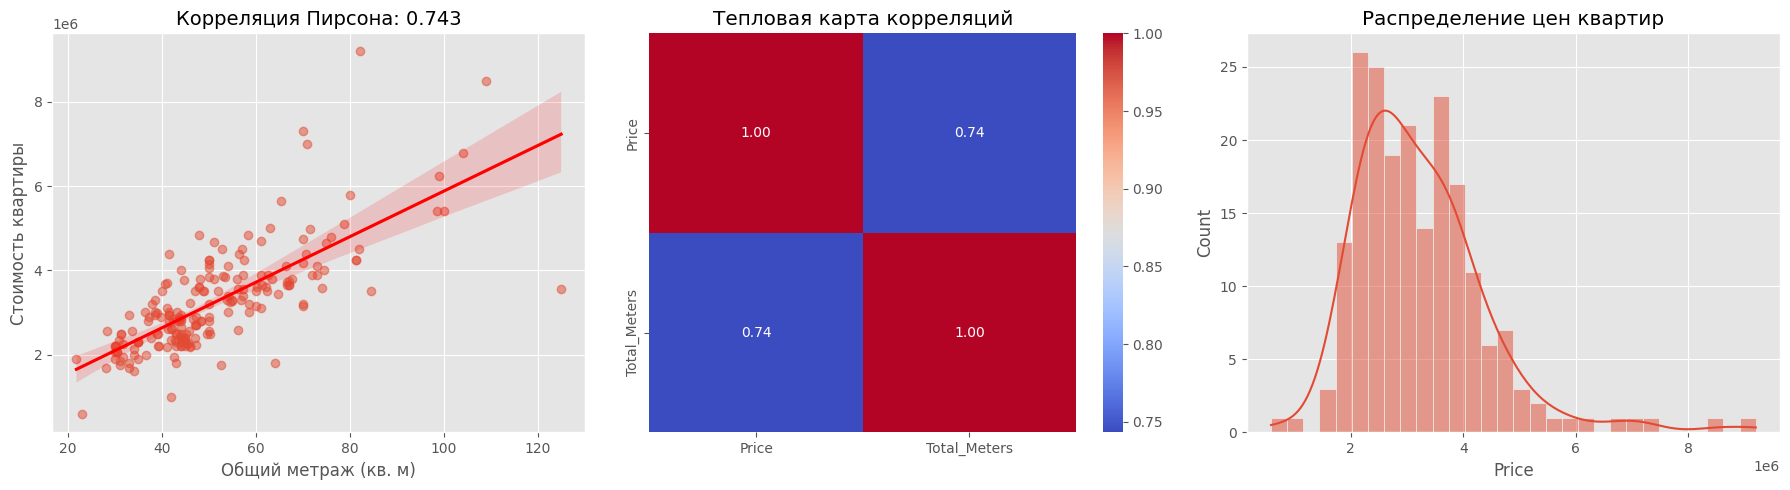

In [290]:
plt.figure(figsize=(18, 5))

# 1. График рассеяния с линейной регрессией
plt.subplot(1, 3, 1)
sns.regplot(x=df_filtered['Total_Meters'], y=df_filtered['Price'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f"Корреляция Пирсона: {pearson_corr:.3f}", fontsize=14)
plt.xlabel("Общий метраж (кв. м)", fontsize=12)
plt.ylabel("Стоимость квартиры", fontsize=12)
plt.grid(True)

# 2. Тепловая карта корреляций
plt.subplot(1, 3, 2)
sns.heatmap(df_filtered[['Price', 'Total_Meters']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")

# 3. Диаграмма распределения цены
plt.subplot(1, 3, 3)
sns.histplot(df_filtered['Price'], bins=30, kde=True)
plt.title("Распределение цен квартир")

plt.tight_layout()
plt.show()

## Корреляция между столбцами Price и Current_Floor для одного района

In [291]:
pearson_corr, spearman_corr, kendall_corr = corr_func(df_filtered[['Price', 'Current_Floor']].dropna(), "Цена vs. Этаж", all_district=False)

Цена vs. Этаж:
Пирсон: 0.424, Спирмен: 0.425, Кендалл: 0.307



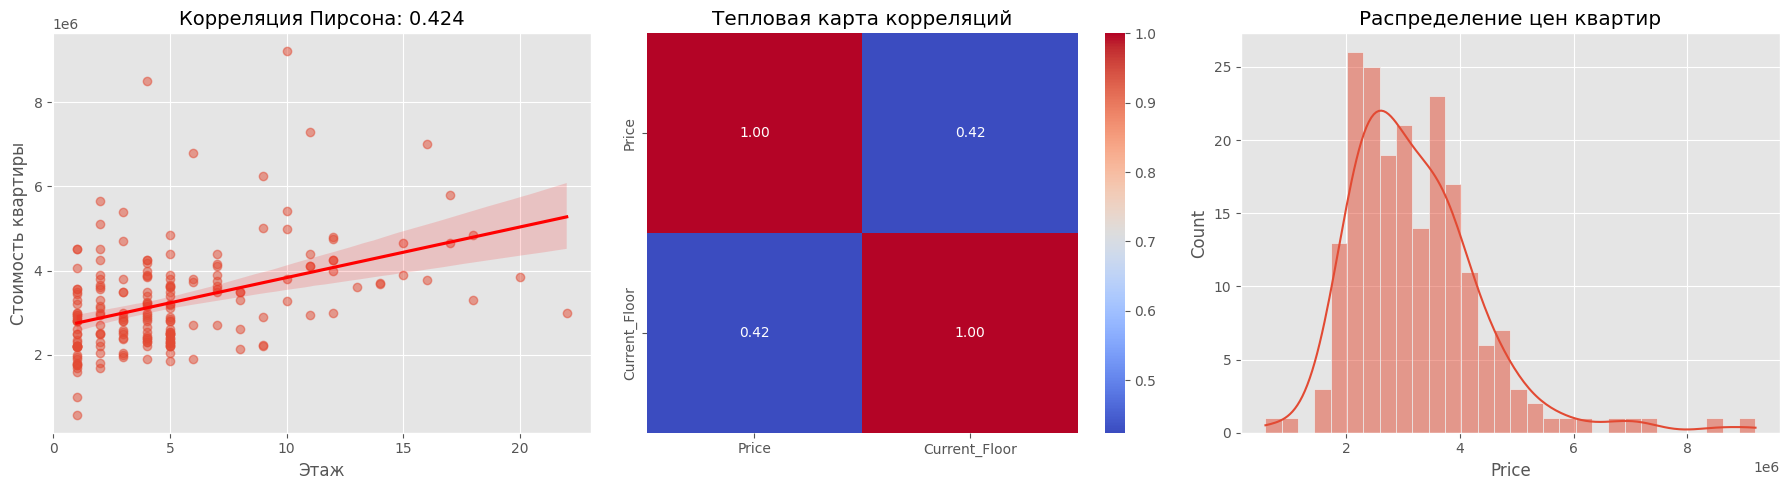

In [292]:
plt.figure(figsize=(18, 5))

# 1. График рассеяния с линейной регрессией
plt.subplot(1, 3, 1)
sns.regplot(x=df_filtered['Current_Floor'], y=df_filtered['Price'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f"Корреляция Пирсона: {pearson_corr:.3f}", fontsize=14)
plt.xlabel("Этаж", fontsize=12)
plt.ylabel("Стоимость квартиры", fontsize=12)
plt.grid(True)

# 2. Тепловая карта корреляций
plt.subplot(1, 3, 2)
sns.heatmap(df_filtered[['Price', 'Current_Floor']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")

# 3. Диаграмма распределения цены
plt.subplot(1, 3, 3)
sns.histplot(df_filtered['Price'], bins=30, kde=True)
plt.title("Распределение цен квартир")

plt.tight_layout()
plt.show()

## Корреляция между столбцами Price и Rooms для одного района

In [293]:
pearson_corr, spearman_corr, kendall_corr = corr_func(df_filtered[['Price', 'Rooms']].dropna(), "Цена vs. Кол-во комнат", all_district=False)

Цена vs. Кол-во комнат:
Пирсон: 0.348, Спирмен: 0.363, Кендалл: 0.284



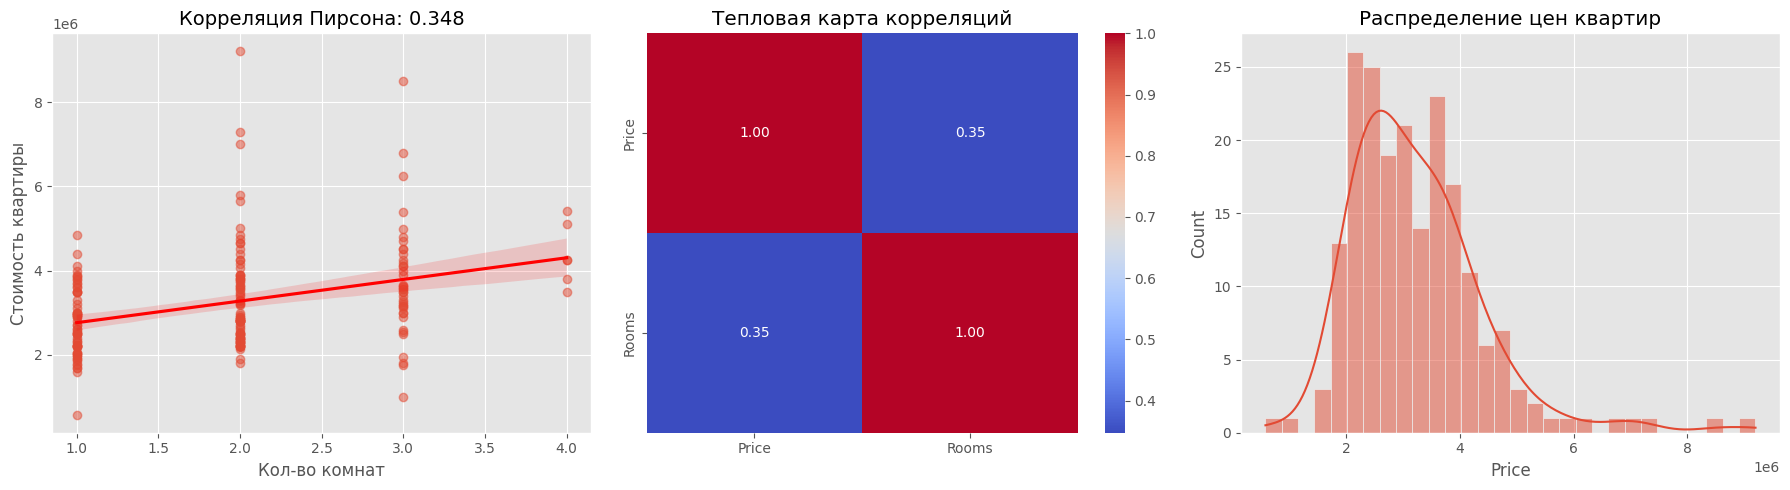

In [294]:
plt.figure(figsize=(18, 5))

# 1. График рассеяния с линейной регрессией
plt.subplot(1, 3, 1)
sns.regplot(x=df_filtered['Rooms'], y=df_filtered['Price'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f"Корреляция Пирсона: {pearson_corr:.3f}", fontsize=14)
plt.xlabel("Кол-во комнат", fontsize=12)
plt.ylabel("Стоимость квартиры", fontsize=12)
plt.grid(True)

# 2. Тепловая карта корреляций
plt.subplot(1, 3, 2)
sns.heatmap(df_filtered[['Price', 'Rooms']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")

# 3. Диаграмма распределения цены
plt.subplot(1, 3, 3)
sns.histplot(df_filtered['Price'], bins=30, kde=True)
plt.title("Распределение цен квартир")

plt.tight_layout()
plt.show()

## Сравним результаты корреляции определенного района и всего города

In [296]:
df_comparison = pd.DataFrame(data)
display(df_comparison)

,Метрика,Пирсон (все районы),Пирсон (конкретный),Спирмен (все районы),Спирмен (конкретный),Кендалл (все районы),Кендалл (конкретный)
0,Цена vs. Метраж,0.872582,0.743077,0.840070,0.758810,0.649200,0.563773
1,Цена vs. Этаж,0.052389,0.423975,0.161401,0.424918,0.111790,0.306527
2,Цена vs. Кол-во комнат,0.557941,0.347581,0.625358,0.362628,0.501393,0.284208


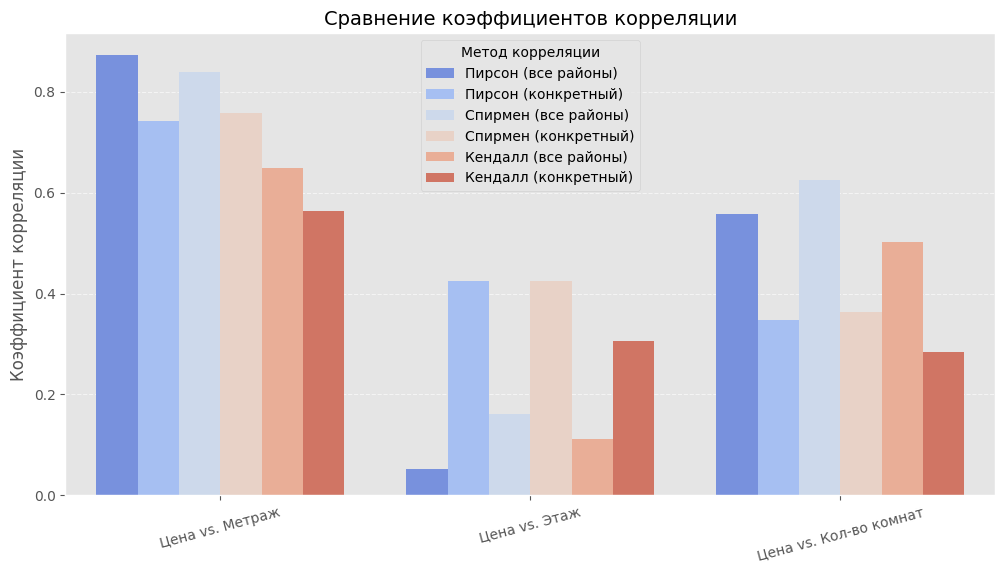

In [297]:
df_melted = df_comparison.melt(id_vars=['Метрика'], var_name="Тип корреляции", value_name="Значение")

plt.figure(figsize=(12, 6))
sns.barplot(x="Метрика", y="Значение", hue="Тип корреляции", data=df_melted, palette="coolwarm")

plt.title("Сравнение коэффициентов корреляции", fontsize=14)
plt.xlabel("")
plt.ylabel("Коэффициент корреляции")
plt.xticks(rotation=15)
plt.legend(title="Метод корреляции")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Выводы

1. Наибольшая корреляция наблюдается между ценой и метражом:

*   Все три метода показывают высокие значения (более 0.6), причем коэффициент Пирсона наиболее высокий (≈ 0.85), что подтверждает линейную зависимость.
*   Корреляция Спирмена и Кендалла несколько ниже, но также значительна.

---

2. Связь между ценой и этажом слабая:

Пирсон показывает практически нулевую корреляцию.

*   Пирсон показывает практически нулевую корреляцию.
*   Спирмен и Кендалл дают небольшие положительные значения, что говорит о незначительной нелинейной зависимости.

---

3. Связь между ценой и количеством комнат варьируется:

*   Для всех районов Спирмен показывает наибольшую корреляцию (≈ 0.6), в то время как у Пирсона и Кендалла значения умеренные.
*   В конкретных выборках корреляция заметно ниже, что может указывать на различия в распределении квартир по районам.

---

Метраж является ключевым фактором, влияющим на цену, тогда как этаж оказывает минимальное влияние. Количество комнат демонстрирует умеренную корреляцию, однако её величина зависит от выборки.
